# We will first import a pre processed 1797 hand writeen digits into our programm
### We can have our own data also, but we are using pre-loaded data to save time,

In [24]:
from sklearn.datasets import load_digits
digits = load_digits()

#### Now we will see in what shape our data is, (which is 1797 digit, with image already converted to numpy array, and preprocessad of all noise )

In [25]:

print("Shape of our feature, ie. our 8*8 pixels forming an image of digit " + str(digits.data.shape) )

print("Shape of our Label, ie, the target data : " + str( digits.target.shape) )

Shape of our feature, ie. our 8*8 pixels forming an image of digit (1797, 64)
Shape of our Label, ie, the target data : (1797,)


In [26]:
import numpy as np 
import matplotlib.pyplot as plt

### Now we will show some image of the digits, so that we know how it looks,
### The data set we have loaded is in very low pixel density, just to prove how strong our prediction can be, even when digits are not of goodd quality

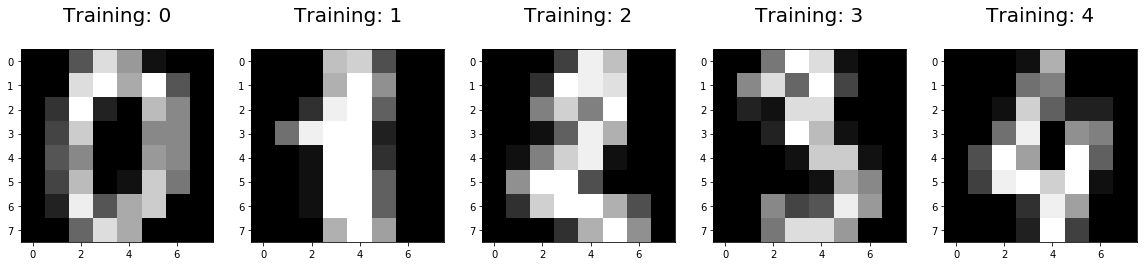

In [27]:
plt.figure(figsize=(20,4)) # showing images of digits in a plot alaong an indexed sabplot


# we use inumerate so that we know how many iteration our for loop as passed
#and we use zip to make together two list into one, value by value
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

### As we always do , we split our data into, two parts, some pair of x,y into train and some pair of test

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

# Logistic Regression Model

### We import our logistic model now, and we fit our data into that model to be predicted when needed, or just to test

In [29]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
our_prediction = logisticRegr.predict(x_test[87].reshape(1,-1))
print our_prediction

[5]


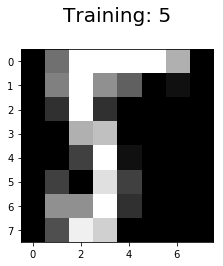

In [31]:
#plotting our data
plt.figure(figsize=(20,4))
plt.subplot(1, 5, index + 1)
plt.title('Training: %i\n' % y_test[87], fontsize = 20)
plt.imshow(np.reshape(x_test[87], (8,8)), cmap=plt.cm.gray)

In [32]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

## DIY : Try your hands now in plotting all the predicted values, into subplots, and see if some ddigit was wrongly predicted

In [33]:
#predicting on all dataset
predictions = logisticRegr.predict(x_test)

In [34]:
#Testing scores now
score = logisticRegr.score(x_test, y_test)

In [35]:
print(score)

0.9533333333333334


## Our Accuracy now gives us only 95%, we will now go ahead and try to do it with knn

### In your time, do try to make confusion matrix and see how many got wrong, and which digit was hard to predict,
### and also try plot all those digits which were wrong, (using a for loop)

# KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier()

In [38]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## As we did plotting above, DIY the same thing we tried earlier

In [39]:
knn.predict(x_test[0:10])
# we will see if the ooutput of our some test data sample are same as logistic prediction or not

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [40]:
print knn.score(x_test, y_test)

0.98


# Confusion Matrix
## To see which digits of our were more tricky to predict

In [41]:
# we import seaborn library, which is based on matplotlib
## which inturn is based on matlab like plotting
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [42]:
#making a matrix of confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
print cm

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


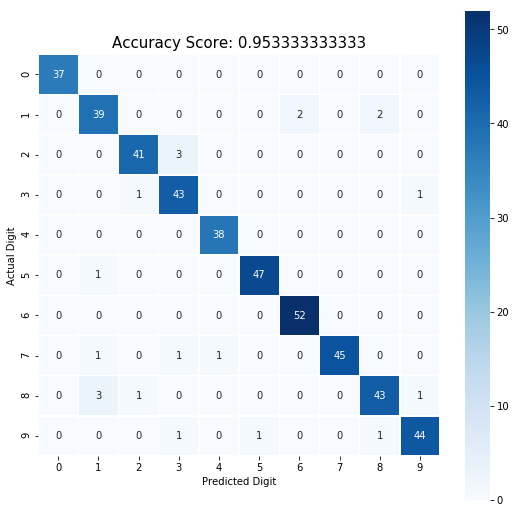

In [43]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual Digit');
plt.xlabel('Predicted Digit');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Now as we have seen earlier how we makee subplot with indexing,  try to make two plots of confusion matrix of Logistic and KNN side by side

# If extra efforts counts,
## Above code can be beautifully presented as below,
### not necessarily a needed thing to do, but still

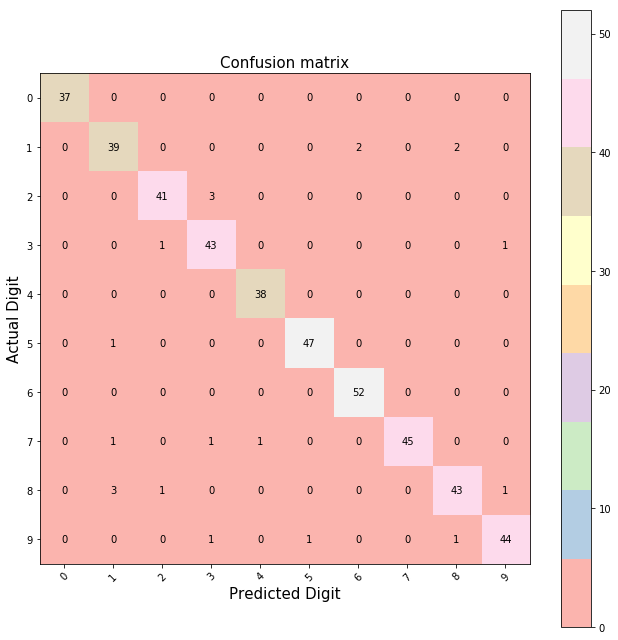

In [44]:
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))

plt.title('Confusion matrix', size = 15)
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')

plt.colorbar()

#making tick marks
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)


plt.tight_layout()
plt.ylabel('Actual Digit', size = 15)
plt.xlabel('Predicted Digit', size = 15)
width, height = cm.shape

for x in xrange(width):
    for y in xrange(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')